In [7]:
#dependencies
import os
import json
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
plt.style.use('ggplot')

In [8]:
#Reading JSON File
f = open('.../paubhaji.json', encoding = "utf8") #Location Of Json file
data = json.load(f)

#Converting into DataFrame and flattening JSON 
df_data = pd.DataFrame(data)
df_data = json_normalize(data)

Columns = ["comments_disabled", "height" ,"width", "url", "like_count", "media_preview_like_count", "caption", "comment_count", "id", "is_video", "location", "has_public_page" , "locaton_id", "location_name", "location_slug", "owner_id", "shortcode", "tags", "timestamp", "thumbnail_resources", "thumbnail_src", "urls", "video_view_count"]
df_data.columns = Columns
df_data = df_data[[ "id",  "timestamp","height" ,"width", "url",  "caption", "tags", "like_count", "media_preview_like_count", "comments_disabled","comment_count","is_video", "location", "has_public_page" , "locaton_id", "location_name", "location_slug", "owner_id", "shortcode", "thumbnail_resources", "thumbnail_src", "urls", "video_view_count"]]
df_data.head()


,id,timestamp,height,width,url,caption,tags,like_count,media_preview_like_count,comments_disabled,...,has_public_page,locaton_id,location_name,location_slug,owner_id,shortcode,thumbnail_resources,thumbnail_src,urls,video_view_count
0,1834712933156555738,1532934873,734,640,https://instagram.fpnq3-1.fna.fbcdn.net/vp/352...,[{'node': {'text': 'TAG A PAV BHAJI FANATIC 😋😍...,"[vadapav, foodgram, foodphotography, foodblogg...",3797,3797,NaN,...,NaN,NaN,NaN,NaN,1919686029,Bl2NbElnIva,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...,0.0
1,1826000656302706137,1531897016,750,750,https://instagram.fpnq3-1.fna.fbcdn.net/vp/b0d...,[{'node': {'text': 'देसी स्टाइल पाव भाजी/Desi ...,"[healthyfood, sokolkata, mumbaifoodie, faridab...",12041,12041,NaN,...,True,245717485,Faridabad,faridabad,1445587278,BlXQewejY3Z,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...,0.0
2,1849962218902145720,1534752790,800,640,https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb4...,[{'node': {'text': 'Pav Bhaji😍😍😋 . Follow @str...,"[foodphotography, mumbaipeople, vascom, delhib...",3544,3544,NaN,...,True,213724095,"Chandigarh, India",chandigarh-india,4759392841,BmsYtYpjkq4,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/64f...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/5e...,0.0
3,1828963273137213680,1532249632,937,750,https://instagram.fpnq3-1.fna.fbcdn.net/vp/180...,[{'node': {'text': 'Asli Makhan Pav bhaji 😍😋 T...,"[foodvideo, misscravingbuster, foodblogger, mu...",1388,1388,NaN,...,True,234730336,Nagpur,nagpur,4628040416,BlhyGgalFDw,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/802...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/33...,0.0
4,1852265507774756954,1535027282,936,750,https://instagram.fpnq3-1.fna.fbcdn.net/vp/5ee...,[{'node': {'text': 'Tag a Pav bhaji lover 👇🏻 😋...,[],223,223,NaN,...,NaN,NaN,NaN,NaN,7798081590,Bm0kapkn3ha,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/292...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/6a...,0.0


In [83]:
# These lists will be use to parse the captions and tags column and find any relevant words metioned
pav_names = ["pav bhaji" ,"pavbhaji", "Pav Bhaji", "PAV BHAJI", "Paav Bhaji", "paav bhaji", "PAAV BHAJI", "paavbhaji", "Pav Bhajji", "PAV BHAJJI", "pavbhajji", 'pav bhajji']
food_names = ["food", "Food", "FOOD"]

In [84]:
# To find above listed words in captions and tags 
def find_word_special(word_list, word_string):
    val = 0
    for element in word_list:
        loc = word_string.find(element)
        if(loc == 0):
            return 2
        elif(loc != -1 and word_string[loc - 1] != " "):
            return 2
        elif(loc != -1 and word_string[loc - 1] == "#"):
            val = 1
    return val    
def find_word_normal(word_list, word_string):
    for element in word_list:
        if(element in word_string):
            return 1
        else:
            return 0

df_data['tags_has_food'] = df_data['tags'].apply(lambda x : find_word_normal(food_names, str(x)) )
df_data['tags_has_pav'] = df_data['tags'].apply(lambda x : find_word_normal(pav_names, str(x)))

df_data['caption_has_food'] = df_data['caption'].apply(lambda x : find_word_normal(food_names, str(x)))
df_data['caption_has_pav'] = df_data['caption'].apply(lambda x : find_word_special(pav_names, str(x)))

df_data.head()

,id,timestamp,height,width,url,caption,tags,like_count,media_preview_like_count,comments_disabled,...,shortcode,thumbnail_resources,thumbnail_src,urls,video_view_count,tags_has_food,tags_has_pav,caption_has_food,caption_has_pav,label
0,1834712933156555738,1532934873,734,640,https://instagram.fpnq3-1.fna.fbcdn.net/vp/352...,[{'node': {'text': 'TAG A PAV BHAJI FANATIC 😋😍...,"[vadapav, foodgram, foodphotography, foodblogg...",3797,3797,NaN,...,Bl2NbElnIva,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...,0.0,1,0,1,2,NaN
1,1826000656302706137,1531897016,750,750,https://instagram.fpnq3-1.fna.fbcdn.net/vp/b0d...,[{'node': {'text': 'देसी स्टाइल पाव भाजी/Desi ...,"[healthyfood, sokolkata, mumbaifoodie, faridab...",12041,12041,NaN,...,BlXQewejY3Z,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...,0.0,1,0,1,2,NaN
2,1849962218902145720,1534752790,800,640,https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb4...,[{'node': {'text': 'Pav Bhaji😍😍😋 . Follow @str...,"[foodphotography, mumbaipeople, vascom, delhib...",3544,3544,NaN,...,BmsYtYpjkq4,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/64f...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/5e...,0.0,1,0,1,2,NaN
3,1828963273137213680,1532249632,937,750,https://instagram.fpnq3-1.fna.fbcdn.net/vp/180...,[{'node': {'text': 'Asli Makhan Pav bhaji 😍😋 T...,"[foodvideo, misscravingbuster, foodblogger, mu...",1388,1388,NaN,...,BlhyGgalFDw,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/802...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/33...,0.0,1,0,1,2,NaN
4,1852265507774756954,1535027282,936,750,https://instagram.fpnq3-1.fna.fbcdn.net/vp/5ee...,[{'node': {'text': 'Tag a Pav bhaji lover 👇🏻 😋...,[],223,223,NaN,...,Bm0kapkn3ha,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/292...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/6a...,0.0,0,0,0,0,NaN


In [85]:
#Find files and classify data as not pav bhaji "0" and pav bhaji "1"
def check_exists(name_string):
    os.chdir("...") # Location of Images
    name = name_string.split('/')
    PATH_1 = os.path.join(os.getcwd(), "1")
    PATH_0 = os.path.join(os.getcwd(), "0")
    if(os.path.exists(os.path.join(PATH_1, name[-1]))):
        return 1
    elif(os.path.exists(os.path.join(PATH_0, name[-1]))):
        return 0
    else:
        return np.nan
    
df_data['label'] = df_data['url'].apply(lambda x : check_exists(x))

count = 0
for ele in df_data['label']:
    if(ele == 0 or ele == 1):
        count +=1
print(count)
df_data.head(2)

452


,id,timestamp,height,width,url,caption,tags,like_count,media_preview_like_count,comments_disabled,...,shortcode,thumbnail_resources,thumbnail_src,urls,video_view_count,tags_has_food,tags_has_pav,caption_has_food,caption_has_pav,label
0,1834712933156555738,1532934873,734,640,https://instagram.fpnq3-1.fna.fbcdn.net/vp/352...,[{'node': {'text': 'TAG A PAV BHAJI FANATIC 😋😍...,"[vadapav, foodgram, foodphotography, foodblogg...",3797,3797,NaN,...,Bl2NbElnIva,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...,0.0,1,0,1,2,NaN
1,1826000656302706137,1531897016,750,750,https://instagram.fpnq3-1.fna.fbcdn.net/vp/b0d...,[{'node': {'text': 'देसी स्टाइल पाव भाजी/Desi ...,"[healthyfood, sokolkata, mumbaifoodie, faridab...",12041,12041,NaN,...,BlXQewejY3Z,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...,0.0,1,0,1,2,NaN


In [113]:
# Check if location is Mumbai/Bombay
City = ['Mumbai', 'mumbai', 'Bombay', 'bombay']

def loc_mum(city_list, ele):
    for word in city_list:
        if(word in ele):
            return True
    return False

df_final = df_data[['id','tags_has_food', 'location_name', 'tags_has_pav','caption_has_food' ,'caption_has_pav' ,'like_count','label']]
df_final['location_name'].fillna("No Place", inplace=True)
df_final['location_name'] = df_final['location_name'].apply(lambda x : 1 if(loc_mum(City,x)) else 0)

#Remove those values that don't have a label
df_final = df_final.dropna(subset = ['label'])
df = np.where(df_final['location_name'] == df_final['label'])
#print(df)
#Reset Index
df_final = df_final.reset_index(drop ="True")


#df_final.describe()

# Some Data Analysis

like_for_pav = 0
like_for_notpav = 0
loc_mum_pav = 0
for i in range(452):
    if(df_final['location_name'][i] == 1 and df_final['label'][i] == 1):
        loc_mum_pav +=1
    if(df_final['label'][i] == 1):
        like_for_pav += df_final['like_count'][i] 
    else:
        like_for_notpav += df_final['like_count'][i]

print("Total Pav Bhaji pics from Mumbai" +str(loc_mum_pav))
print("Average Likes for Pav Bhaji Pics : " + str(like_for_pav/183))
print("Average Likes for Non Pav Bhaji Pics :" +  str(like_for_notpav/269))
        



Total Pav Bhaji pics from Mumbai6
Average Likes for Pav Bhaji Pics : 220.44262295081967
Average Likes for Non Pav Bhaji Pics :255.98513011152417


c:\users\sahil basera\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


[183, 269]


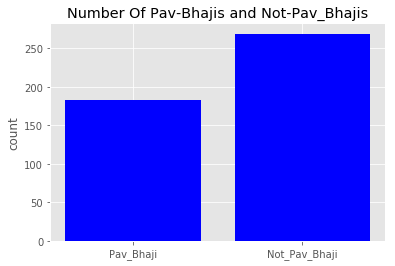

In [110]:
count_0 = 0
count_1 = 0

for element in df_final['label']:
    if(element == 1):
        count_1 += 1
    else:
        count_0 += 1
        
li = [count_1, count_0]

print(li)
label = ['Pav_Bhaji', 'Not_Pav_Bhaji']
x_pos = [i for i, _ in enumerate(label)]


plt.bar(x_pos,li, color='blue')
plt.xlabel("")
plt.ylabel("count")
plt.title("Number Of Pav-Bhajis and Not-Pav_Bhajis")

plt.xticks(x_pos, label)

plt.show()


Feature: 0, Score: 0.18325
Feature: 1, Score: 0.27597
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.05099
Feature: 4, Score: 0.48980


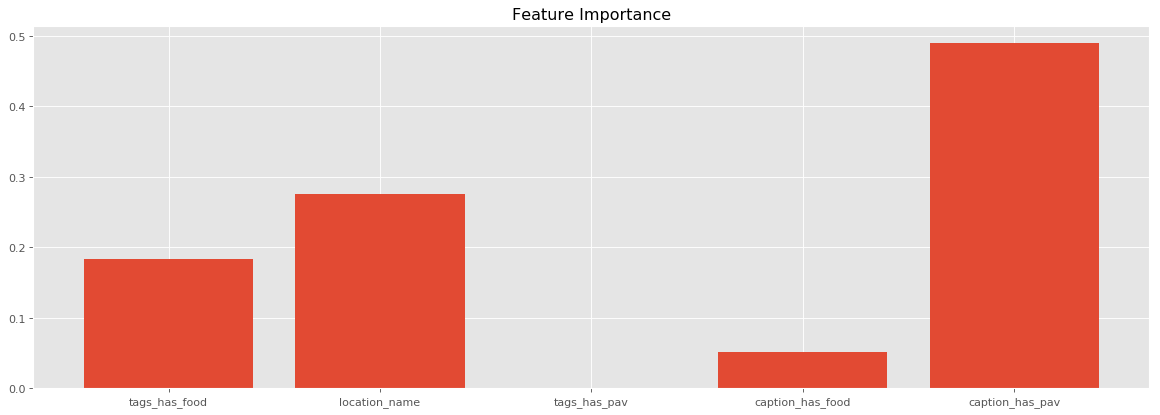

In [102]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

df_test = df_final[['tags_has_food', 'location_name', 'tags_has_pav','caption_has_food' ,'caption_has_pav','label']]

Y = df_final['label']
X = df_final.drop(['label', 'tags_has_pav'], axis=1)

Y_graph = df_test['label']
X_graph = df_test.drop(['label'], axis=1)

cols = X_graph.columns
model.fit(X_graph, Y_graph)

importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

num = [x for x in range(len(importance))]
   
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')    
plt.bar(num, importance)
plt.title("Feature Importance")
plt.xticks(num, cols)
plt.show()

In [103]:
#Machine Learning 
#Finding the best parameters for Algorithm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


#To find best combo of n_estimators and learning_rate

def find_optimal_parameters():
    best_n_estimator = 0
    best_learning_rate = 0
    max_val = 0
    for i in range(1,200,10):
        for j in np.arange(0.01,2,0.5):
            model_1 = AdaBoostClassifier(n_estimators=i, learning_rate = j)
            model_1.fit(X_train, Y_train)
            #model_1.predict(X_test) 
            r = model_1.score(X_test, Y_test)
            if(r > max_val):
                max_val= r
                best_n_estimator = i
                best_learning_rate = j
    return max_val, best_n_estimator, best_learning_rate            
        
a, b ,c = find_optimal_parameters()
print("Best overall accuracy : " +str(a))
print("Best number of estimators : " + str(b))
print("Best learning rate : " + str(c))

Best overall accuracy : 0.6373626373626373
Best number of estimators : 111
Best learning rate : 1.51


In [104]:
#Dummy Classifier used for a baseline, it represents a random guess with no model

from sklearn.dummy import DummyClassifier
target_names = ['class not pav', 'class pav']
model_dumb = DummyClassifier()
model_dumb.fit(X_train, Y_train)
Y_pred = model_dumb.predict(X_test)
print("-----------------------DUMMY CLASSIFIER REPORT-------------------------------")
print(classification_report(Y_test, Y_pred, target_names = target_names))

-----------------------DUMMY CLASSIFIER REPORT-------------------------------
               precision    recall  f1-score   support

class not pav       0.55      0.66      0.60        47
    class pav       0.54      0.43      0.48        44

     accuracy                           0.55        91
    macro avg       0.55      0.55      0.54        91
 weighted avg       0.55      0.55      0.54        91



c:\users\sahil basera\appdata\local\programs\python\python36\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [105]:
#Using the best estimators for final model
model_final = AdaBoostClassifier(n_estimators=111, learning_rate = 1.51)
model_final.fit(X_train, Y_train)
model_final.predict(X_test)
y_pred = model_final.predict(X_test)

print("-----------------------ADABOOST CLASSIFIER REPORT----------------------\n")
print(classification_report(Y_test, y_pred, target_names=target_names))
print("AS YOU CAN SEE, INSPITE OF THE LOW ACCURACY, EVERY ASPECT OF THIS MODEL IS BETTER THAN A RANDOM GUESS")

-----------------------ADABOOST CLASSIFIER REPORT----------------------

               precision    recall  f1-score   support

class not pav       0.61      0.83      0.70        47
    class pav       0.70      0.43      0.54        44

     accuracy                           0.64        91
    macro avg       0.66      0.63      0.62        91
 weighted avg       0.65      0.64      0.62        91

AS YOU CAN SEE, INSPITE OF THE LOW ACCURACY, EVERY ASPECT OF THIS MODEL IS BETTER THAN A RANDOM GUESS


In [106]:
from sklearn.metrics import confusion_matrix
print("-----------------------CONFUSION MATRIX--------------------------\n")
print(confusion_matrix(Y_test, y_pred))

-----------------------CONFUSION MATRIX--------------------------

[[39  8]
 [25 19]]
